# Gradient Boosting
Gradient Boosting is an ensemble machine learning technique that builds models sequentially with each new model correcting the errors of its predecessor. This approach reduces bias and variance which leads to highly accurate predictions.

**Specific Implementations :**

- **XGBoost**: An optimized implementation of Gradient Boosting that is efficient and scalable. Unique features include regularization to prevent overfitting and parallel processing.
- **CatBoost**: Designed to handle categorical features automatically without explicit encoding. It is robust to overfitting and offers fast training.
- **LightGBM**: Known for its speed and efficiency, it uses a novel leaf-wise tree growth algorithm. It is particularly effective on large datasets.


**Hyperparameter Optimization :**

- **Key Hyperparameters**: 
  - Learning Rate
  - Maximum Depth
  - Number of Estimators
  - Subsample
  - Colsample_bytree

- **Tuning Strategies**:
  - **Grid Search**: Systematically exploring a predefined range of hyperparameters.
  - **Random Search**: Randomly sampling hyperparameters within a specified range.
  - **Bayesian Optimization**: Using probabilistic models to find the optimal set of hyperparameters efficiently.



In [1]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -- ------------------------------------- 7.1/124.9 MB 33.6 MB/s eta 0:00:04
   ---- ----------------------------------- 14.7/124.9 MB 35.5 MB/s eta 0:00:04
   ------ --------------------------------- 21.0/124.9 MB 33.1 MB/s eta 0:00:04
   -------- ------------------------------- 26.5/124.9 MB 31.1 MB/s eta 0:00:04
   ---------- ----------------------------- 33.3/124.9 MB 31.1 MB/s eta 0:00:03
   ------------- -------------------------- 40.6/124.9 MB 31.5 MB/s eta 0:00:03
   --------------- ------------------------ 48.5/124.9 MB 32.2 MB/s eta 0:00:03
   ------------------ --------------------- 56.4/124.9 MB 32.6 MB/s eta 0:00:03
   -------------------- ------------------- 64.2/124.9 MB 32.8 MB/s eta 0:00:02
   ---------------------- ----------------- 71.3/124.9 MB 33.0 MB/s eta 0:00:02
   ------------------------- -------------- 78.9/124.9 MB 33.1 MB/s eta 0:00:02
   --------------------------- ------------ 87.0/1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
# Load data using pandas
X_train = pd.read_csv("./dataset/X_train.csv")
y_train = pd.read_csv("./dataset/y_train.csv").squeeze()
X_val = pd.read_csv("./dataset/X_val.csv")
y_val = pd.read_csv("./dataset/y_val.csv").squeeze()
X_test = pd.read_csv("./dataset/X_test.csv")
y_test = pd.read_csv("./dataset/y_test.csv").squeeze()


### XGBoost

In [3]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

In [4]:
# Define parameters for the model
params = {
    'objective': 'reg:squarederror',    #regression task with squared error loss
    'max_depth': 6,                #the maximum depth of the trees 
    'learning_rate': 0.1,       #the learning rate
    'n_estimators': 100,      #the number of boosting rounds or trees to build
    'seed': 42                 #set the random seed for reproducibility
}

In [5]:
# Train the model
xgb_model = xgb.train(
    params,
    dtrain,
    evals=[(dval, "val")],
    num_boost_round=100, #number of boosting rounds
    early_stopping_rounds=10 #early stopping to prevent overfitting
)

[0]	val-rmse:7.07955
[1]	val-rmse:6.67032
[2]	val-rmse:6.26419
[3]	val-rmse:5.93630
[4]	val-rmse:5.62759


c:\Users\Muqri Qawiem\Downloads\data-mining-warehousing-wages-analysis\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	val-rmse:5.36969
[6]	val-rmse:5.12055
[7]	val-rmse:4.91389
[8]	val-rmse:4.68209
[9]	val-rmse:4.53767
[10]	val-rmse:4.35483
[11]	val-rmse:4.22171
[12]	val-rmse:4.08467
[13]	val-rmse:3.97397
[14]	val-rmse:3.87703
[15]	val-rmse:3.78221
[16]	val-rmse:3.69286
[17]	val-rmse:3.61448
[18]	val-rmse:3.53666
[19]	val-rmse:3.47298
[20]	val-rmse:3.41845
[21]	val-rmse:3.36337
[22]	val-rmse:3.31205
[23]	val-rmse:3.26505
[24]	val-rmse:3.22172
[25]	val-rmse:3.17797
[26]	val-rmse:3.13159
[27]	val-rmse:3.09979
[28]	val-rmse:3.06682
[29]	val-rmse:3.03588
[30]	val-rmse:3.01145
[31]	val-rmse:2.97808
[32]	val-rmse:2.95302
[33]	val-rmse:2.92542
[34]	val-rmse:2.89475
[35]	val-rmse:2.87500
[36]	val-rmse:2.85232
[37]	val-rmse:2.83177
[38]	val-rmse:2.80869
[39]	val-rmse:2.79525
[40]	val-rmse:2.77713
[41]	val-rmse:2.75973
[42]	val-rmse:2.74492
[43]	val-rmse:2.72682
[44]	val-rmse:2.71087
[45]	val-rmse:2.69415
[46]	val-rmse:2.67776
[47]	val-rmse:2.67020
[48]	val-rmse:2.65847
[49]	val-rmse:2.64854
[50]	val-rmse:2

XGBoost model training log shows the Root Mean Squared Error (RMSE) for each boosting round on the validation set. It indicates that the model's performance is improving as the training progresses. The RMSE is decreasing with each boosting round, which is a good sign.

In [6]:
# Predict and evaluate the model
y_pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"XGBoost - RMSE: {rmse}")

XGBoost - RMSE: 2.272001394274581


An RMSE of 2.27 means that, on average, the predictions are about 2.27 units away from the actual values of the target variable

#### GridSearch tuning

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

In [8]:
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

In [9]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [10]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 8],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
# Best parameters and model
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [12]:
# Evaluate the best model
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Tuned XGBoost - RMSE: {rmse}")

Tuned XGBoost - RMSE: 1.9504878075334087


With these tuned hyperparameters, XGBoost model achieved an RMSE of 1.95, which is an improvement from the previous RMSE of 2.27.

#### RandomSearch tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'max_depth': [3, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

In [14]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [15]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 6, 8],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [16]:
# Best parameters and model
best_params_random = random_search.best_params_
print(f"Best parameters (Random Search): {best_params_random}")

Best parameters (Random Search): {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}


In [17]:
# Evaluate the best model
best_xgb_model_random = random_search.best_estimator_
y_pred_random = best_xgb_model_random.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
rmse_random = mse_random ** 0.5
print(f"Tuned XGBoost (Random Search) - RMSE: {rmse_random}")


Tuned XGBoost (Random Search) - RMSE: 1.9504878075334087


It looks like the best hyperparameters found through Random Search are the same as those found through Grid Search. The RMSE remains consistent at 1.95 which indicates that I've reached a stable point in terms of performance with these hyperparameters.

**Best Hyperparameters for XGBoost**

Based on the results from both Grid Search and Random Search, the best hyperparameters for XGBoost model are:

- **Learning Rate**: 0.2
- **Max Depth**: 3
- **Number of Estimators (Boosting Rounds)**: 200
- **Subsample**: 0.7

These hyperparameters provided the optimal performance with an RMSE of 1.95 whihc indicate a robust and well-tuned model.


### LightBGM

In [5]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 16.0.2+7-67, mixed mode, sharing)
  Starting server from C:\Users\Muqri Qawiem\Downloads\data-mining-warehousing-wages-analysis\venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MUQRIQ~1\AppData\Local\Temp\tmpc1scdyed
  JVM stdout: C:\Users\MUQRIQ~1\AppData\Local\Temp\tmpc1scdyed\h2o_Muqri_Qawiem_started_from_python.out
  JVM stderr: C:\Users\MUQRIQ~1\AppData\Local\Temp\tmpc1scdyed\h2o_Muqri_Qawiem_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Asia/Kuala_Lumpur
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_Muqri_Qawiem_suk2ul
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.955 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [6]:
# Load the pre-split datasets into H2O
X_train = h2o.import_file("./dataset/X_train.csv")
y_train = h2o.import_file("./dataset/y_train.csv")
X_val = h2o.import_file("./dataset/X_val.csv")
y_val = h2o.import_file("./dataset/y_val.csv")
X_test = h2o.import_file("./dataset/X_test.csv")
y_test = h2o.import_file("./dataset/y_test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
# Combine X and y for H2O training (H2O expects the target to be part of the dataset)
train = X_train.cbind(y_train)
val = X_val.cbind(y_val)
test = X_test.cbind(y_test)

In [8]:
# Define the target and features
target = "yearly_compensation"
features = [col for col in train.columns if col != target]

In [9]:
# Train a LightGBM model (using H2OGradientBoostingEstimator)
lgb_model = H2OGradientBoostingEstimator(
    ntrees=200,
    max_depth=3,
    learn_rate=0.2,
    sample_rate=0.7,
    seed=42,
    nfolds=5,
    keep_cross_validation_predictions=True
)

In [10]:
# Train the model
lgb_model.train(x=features, y=target, training_frame=train, validation_frame=val)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1735377817893_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    200                200                         30969                  3            3            3             5             8             7.635

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.5244371535153698
RMSE: 1.2346809926111966
MAE: 0.9736999388535772
RMSLE: NaN
Mean Residual Deviance: 1.5244371535153698

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 4.741300687889309
RMSE: 2.177452798085256
MAE: 1.67012351343001
RMSLE: NaN
Mean Residual Deviance: 4.741300687889309

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4.210716554960833
RMSE: 2.0520030591987024
MAE: 1.5779320679981392
RMSLE: NaN
Mean Residual Deviance: 4.210716554960833

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0           nan           nan           nan           nan           nan
loglikelihood           nan       0           nan           nan           nan           nan           nan
mae                     1.57711   0.0367037   1.59163       1.61983       1.59558       1.54785       1.53069
mean_residual_deviance  4.20547   0.239361    4.30267       4.49212       4.315         4.00268       3.91489
mse                     4.20547   0.239361    4.30267       4.49212       4.315         4.00268       3.91489
r2                      0.926647  0.00557399  0.923618      0.922692      0.922789      0.928479      0.935659
residual_deviance       4.20547   0.239361    4.30267       4.49212       4.315         4.00268       3.91489
rmse                    2.05006   0.0584982   2.07429       2.11946       2.07726       2.00067       1.97861
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2024-12-28 17:24:55  17.386 sec  0.0                7.575565475958797   6.8359982780259285  57.38919228053883    7.5782555687386     6.838680576105013   57.4299574651176
     2024-12-28 17:24:55  17.511 sec  1.0                7.068092973493112   6.332227284315633   49.957938281942695   7.130749418825802   6.3914577511434905  50.84758727408452
     2024-12-28 17:24:55  17.567 sec  2.0                6.6019987096301165  5.8556292277593105  43.58638696195773    6.666592592638876   5.916797020502945   44.44345679622753
     2024-12-28 17:24:55  17.591 sec  3.0                6.292468392660393   5.560436342417222   39.59515847263007    6.397304306791603   5.658376981049131   40.925502393694394
     2024-12-28 17:24:55  17.613 sec  4.0                6.023265264262624   5.321110372688334   36.2797244436727     6.132757260378712   5.424455478033011   37.610711614727805
     2024-12-28 17:24:55  17.634 sec  5.0                5.765991794163651   5.070558614970171   33.24666137036256    5.923463424381641   5.21859154148824    35.087418939987074
     2024-12-28 17:24:55  17.655 sec  6.0                5.5569550613717125  4.865409163289683   30.87974955410469    5.7450379734963715  5.0366025

In [11]:
# Evaluate model performance on the test set
lgb_perf = lgb_model.model_performance(test_data=test)
print("LightGBM Performance:")
print(lgb_perf)

LightGBM Performance:
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 4.503126483773885
RMSE: 2.1220571348985597
MAE: 1.6262137519651245
RMSLE: NaN
Mean Residual Deviance: 4.503126483773885


**Analysis**

| Metric                  | LightGBM Value | XGBoost Value | Interpretation |
|-------------------------|----------------|---------------|----------------|
| **RMSE**                | 2.1221         | 1.95          | This is slightly higher than XGBoost model's RMSE, indicating that XGBoost performed slightly better on your dataset. |
| **MAE**                 | 1.6262         | -             | An average absolute difference between the predicted and actual values, showing how close the predictions are on average. |
| **MSE**                 | 4.5031         | -             | Indication of the overall prediction errors. |
| **Mean Residual Deviance** | 4.5031       | -             | Indication of the overall prediction errors. |


#### GridSearch tuning

In [15]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

# Define the hyperparameter grid
hyper_params = {
    'ntrees': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learn_rate': [0.01, 0.05, 0.1, 0.2],
    'sample_rate': [0.7, 0.8, 0.9, 1.0]
}

In [16]:
# Initialize the H2O Gradient Boosting Estimator
lgb_model = H2OGradientBoostingEstimator(seed=42, nfolds=3, keep_cross_validation_predictions=True)

In [17]:
# Initialize H2O Grid Search
grid = H2OGridSearch(model=lgb_model, hyper_params=hyper_params, grid_id='lgb_grid', search_criteria={'strategy': 'RandomDiscrete', 'max_models': 20})

In [18]:
# Train the model
grid.train(x=features, y=target, training_frame=train, validation_frame=val)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,learn_rate,max_depth,ntrees,sample_rate,model_ids,residual_deviance
,0.1,5.0,300.0,0.9,lgb_grid_model_4,4.4238845
,0.1,3.0,300.0,0.9,lgb_grid_model_14,4.4387532
,0.2,3.0,200.0,0.7,lgb_grid_model_2,4.5720679
,0.2,3.0,200.0,1.0,lgb_grid_model_8,4.7454529
,0.1,7.0,300.0,0.7,lgb_grid_model_17,4.7916691
,0.05,5.0,300.0,1.0,lgb_grid_model_3,4.9787787
,0.2,5.0,200.0,0.7,lgb_grid_model_11,5.1831146
,0.1,7.0,300.0,0.9,lgb_grid_model_16,5.2565673
,0.2,5.0,100.0,0.7,lgb_grid_model_5,5.5658397
,0.05,5.0,200.0,1.0,lgb_grid_model_15,5.6268139


In [19]:
# Get the best model from the grid search
best_lgb_model = grid.get_grid(sort_by='rmse', decreasing=False).models[0]

In [20]:
# Evaluate the best model on the test set
lgb_perf = best_lgb_model.model_performance(test_data=test)
print("Tuned LightGBM Performance:")
print(lgb_perf)

Tuned LightGBM Performance:
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 3.895509234076061
RMSE: 1.9737044444587089
MAE: 1.4640638306603255
RMSLE: NaN
Mean Residual Deviance: 3.895509234076061


#### RandomSearch tuning

In [21]:
# Define the hyperparameter grid
hyper_params = {
    'ntrees': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learn_rate': [0.01, 0.05, 0.1, 0.2],
    'sample_rate': [0.7, 0.8, 0.9, 1.0]
}

# Define the search criteria
search_criteria = {
    'strategy': 'RandomDiscrete',
    'max_models': 20,
    'seed': 42
}

In [22]:
# Initialize the H2O Gradient Boosting Estimator
lgb_model = H2OGradientBoostingEstimator(seed=42, nfolds=3, keep_cross_validation_predictions=True)

# Initialize H2O Grid Search
grid = H2OGridSearch(model=lgb_model, hyper_params=hyper_params, search_criteria=search_criteria)

In [23]:
# Train the model
grid.train(x=features, y=target, training_frame=train, validation_frame=val)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,learn_rate,max_depth,ntrees,sample_rate,model_ids,residual_deviance
,0.05,5.0,300.0,0.7,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_20,4.4779627
,0.05,7.0,300.0,0.7,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_15,4.6301831
,0.05,5.0,300.0,0.9,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_2,4.8512151
,0.05,5.0,300.0,1.0,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_19,4.9787787
,0.1,7.0,300.0,0.8,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_3,5.0059318
,0.2,5.0,300.0,1.0,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_13,5.0649154
,0.2,5.0,300.0,0.7,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_11,5.1103897
,0.2,5.0,300.0,0.8,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_6,5.1192528
,0.1,3.0,200.0,0.7,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_17,5.1265699
,0.05,5.0,200.0,0.9,Grid_GBM_py_1_sid_8596_model_python_1735377817893_2_model_18,5.5369776


In [24]:
# Get the best model from the grid search
best_lgb_model_random = grid.get_grid(sort_by='rmse', decreasing=False).models[0]

# Evaluate the best model on the test set
lgb_perf = best_lgb_model_random.model_performance(test_data=test)
print("Tuned LightGBM Performance with Random Search:")
print(lgb_perf)

Tuned LightGBM Performance with Random Search:
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 3.9916145674600245
RMSE: 1.9979025420325247
MAE: 1.4826221704503668
RMSLE: NaN
Mean Residual Deviance: 3.9916145674600245


**Analysis**

| Metric                  | Original LightGBM | Tuned LightGBM (Grid Search) | Tuned LightGBM (Random Search) | XGBoost Value | Interpretation |
|-------------------------|-------------------|------------------------------|---------------------------------|---------------|----------------|
| **RMSE**                | 2.1221            | 1.9737                       | 1.9979                          | 1.95          | The RMSE for LightGBM using Grid Search is slightly lower than both the original and Random Search, but XGBoost still performed slightly better. |
| **MAE**                 | 1.6262            | 1.4641                       | 1.4826                          | -             | Provides an average absolute difference between the predicted and actual values, showing how close the predictions are on average. |
| **MSE**                 | 4.5031            | 3.8955                       | 3.9916                          | -             | These metrics also provide an indication of the overall prediction errors. |
| **Mean Residual Deviance** | 4.5031         | 3.8955                       | 3.9916                          | -             | These metrics also provide an indication of the overall prediction errors. |


In [25]:
import h2o
h2o.shutdown(prompt=False)

H2O session _sid_8596 closed.


C:\Users\Muqri Qawiem\AppData\Local\Temp\ipykernel_15596\627165019.py:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


### CatBoost

In [26]:
pip install catboost


   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
   - -------------------------------------- 4.2/101.8 MB 27.9 MB/s eta 0:00:04
   --- ------------------------------------ 10.0/101.8 MB 23.9 MB/s eta 0:00:04
   ------ --------------------------------- 16.0/101.8 MB 25.8 MB/s eta 0:00:04
   -------- ------------------------------- 21.8/101.8 MB 26.5 MB/s eta 0:00:04
   ----------- ---------------------------- 28.3/101.8 MB 27.6 MB/s eta 0:00:03
   ------------- -------------------------- 33.3/101.8 MB 27.1 MB/s eta 0:00:03
   ---------------- ----------------------- 41.4/101.8 MB 28.6 MB/s eta 0:00:03
   ------------------ --------------------- 48.2/101.8 MB 29.2 MB/s eta 0:00:02
   ---------------------- ----------------- 56.4/101.8 MB 30.4 MB/s eta 0:00:02
   ------------------------- -------------- 63.7/101.8 MB 31.0 MB/s eta 0:00:02
   --------------------------- ------------ 70.8/101.8 MB 31.1 MB/s eta 0:00:01
   ------------------------------ --------- 77.3/

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error


In [5]:
# Load data using pandas
X_train = pd.read_csv("./dataset/X_train.csv")
y_train = pd.read_csv("./dataset/y_train.csv").squeeze()
X_val = pd.read_csv("./dataset/X_val.csv")
y_val = pd.read_csv("./dataset/y_val.csv").squeeze()
X_test = pd.read_csv("./dataset/X_test.csv")
y_test = pd.read_csv("./dataset/y_test.csv").squeeze()

In [6]:
# Initialize CatBoost regressor
cat_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=200
)

In [7]:
# Train the model
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=10)

0:	learn: 7.1902527	test: 7.2148048	best: 7.2148048 (0)	total: 174ms	remaining: 34.5s
199:	learn: 1.1770337	test: 1.8440875	best: 1.8440875 (199)	total: 2.28s	remaining: 0us

bestTest = 1.844087462
bestIteration = 199



In [8]:
# Predict and evaluate the model
y_pred = cat_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"CatBoost - RMSE: {rmse}")

CatBoost - RMSE: 1.8558326898167434


**Analysis**

| Metric                  | Original LightGBM | Tuned LightGBM (Grid Search) | Tuned LightGBM (Random Search) | CatBoost Value | XGBoost Value | Interpretation |
|-------------------------|-------------------|------------------------------|---------------------------------|----------------|---------------|----------------|
| **RMSE**                | 2.1221            | 1.9737                       | 1.9979                          | 1.8558         | 1.95          | The RMSE for LightGBM using Grid Search is slightly lower than both the original and Random Search, but CatBoost outperforms all with the lowest RMSE. XGBoost also performs very well. |
| **MAE**                 | 1.6262            | 1.4641                       | 1.4826                          | -              | -             | Provides an average absolute difference between the predicted and actual values, showing how close the predictions are on average. |
| **MSE**                 | 4.5031            | 3.8955                       | 3.9916                          | -              | -             | These metrics also provide an indication of the overall prediction errors. |
| **Mean Residual Deviance** | 4.5031         | 3.8955                       | 3.9916                          | -              | -             | These metrics also provide an indication of the overall prediction errors. |


#### GridSearch tuning

In [9]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

In [10]:
# Initialize the CatBoost regressor
cat_model = CatBoostRegressor(eval_metric='RMSE', random_seed=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [11]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
0:	learn: 7.1621355	total: 7.22ms	remaining: 2.16s
1:	learn: 6.8294099	total: 14.7ms	remaining: 2.2s
2:	learn: 6.5425400	total: 20.7ms	remaining: 2.04s
3:	learn: 6.2946593	total: 26.7ms	remaining: 1.98s
4:	learn: 6.0701402	total: 33.4ms	remaining: 1.97s
5:	learn: 5.8442922	total: 39.4ms	remaining: 1.93s
6:	learn: 5.6460129	total: 46.1ms	remaining: 1.93s
7:	learn: 5.4821936	total: 52ms	remaining: 1.9s
8:	learn: 5.3387536	total: 58.2ms	remaining: 1.88s
9:	learn: 5.1787282	total: 64.6ms	remaining: 1.87s
10:	learn: 5.0470835	total: 70.2ms	remaining: 1.84s
11:	learn: 4.9072900	total: 76.6ms	remaining: 1.84s
12:	learn: 4.7930837	total: 82.8ms	remaining: 1.83s
13:	learn: 4.6874509	total: 88.5ms	remaining: 1.81s
14:	learn: 4.5545503	total: 94.2ms	remaining: 1.79s
15:	learn: 4.4410689	total: 100ms	remaining: 1.77s
16:	learn: 4.3461375	total: 107ms	remaining: 1.78s
17:	learn: 4.2576749	total: 113ms	remaining: 1.76s
18:	learn: 4.17839

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001A18A3E6B20>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error', verbose=2)

In [12]:
# Best parameters and model
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'border_count': 128, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [13]:
# Evaluate the best model
best_cat_model = grid_search.best_estimator_
y_pred = best_cat_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Tuned CatBoost - RMSE: {rmse}")

Tuned CatBoost - RMSE: 1.6578292560778503


#### Hyperparameter tuning with Bayesian optimization

In [14]:
pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 23.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

c:\Users\Muqri Qawiem\Downloads\data-mining-warehousing-wages-analysis\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# Define the objective function
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 128),
        'random_seed': 42,
        'eval_metric': 'RMSE'
    }

    # Initialize and train the model
    cat_model = CatBoostRegressor(**param)
    cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=10, verbose=False)

    # Predict and evaluate the model
    y_pred = cat_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    return rmse


In [17]:
# Create the study and run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-12-28 18:37:11,982] A new study created in memory with name: no-name-6aeb43e0-447b-4390-95d0-ff26909ab671
C:\Users\Muqri Qawiem\AppData\Local\Temp\ipykernel_5488\2511450793.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\Muqri Qawiem\AppData\Local\Temp\ipykernel_5488\2511450793.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 10),
[I 2024-12-28 18:37:14,019] Trial 0 finished with value: 3.223344783344933 and parameters: {'iterations': 245, 'learning_rate': 0.01652661944040478, 'depth': 7, 'l2_leaf_reg': 5.83605951290162

In [18]:
# Get the best hyperparameters
best_params_bayesian = study.best_params
print(f"Best parameters (Bayesian Optimization): {best_params_bayesian}")

Best parameters (Bayesian Optimization): {'iterations': 290, 'learning_rate': 0.08422871930430383, 'depth': 6, 'l2_leaf_reg': 1.9436594342491145, 'border_count': 105}


In [19]:
# Train the final model with the best hyperparameters
best_cat_model_bayesian = CatBoostRegressor(**best_params_bayesian)
best_cat_model_bayesian.fit(X_train, y_train)

0:	learn: 7.2611260	total: 4.63ms	remaining: 1.34s
1:	learn: 6.9566886	total: 8.94ms	remaining: 1.29s
2:	learn: 6.7184143	total: 13.3ms	remaining: 1.28s
3:	learn: 6.4893164	total: 17.3ms	remaining: 1.24s
4:	learn: 6.2778161	total: 21.5ms	remaining: 1.22s
5:	learn: 6.0795656	total: 25.6ms	remaining: 1.21s
6:	learn: 5.9073516	total: 30.1ms	remaining: 1.22s
7:	learn: 5.7160319	total: 34.7ms	remaining: 1.22s
8:	learn: 5.5672495	total: 38.8ms	remaining: 1.21s
9:	learn: 5.4309210	total: 42.6ms	remaining: 1.19s
10:	learn: 5.2932931	total: 46.9ms	remaining: 1.19s
11:	learn: 5.1496541	total: 50.6ms	remaining: 1.17s
12:	learn: 5.0312843	total: 54.6ms	remaining: 1.16s
13:	learn: 4.9220450	total: 58.7ms	remaining: 1.16s
14:	learn: 4.7982671	total: 62.5ms	remaining: 1.15s
15:	learn: 4.7095666	total: 66.5ms	remaining: 1.14s
16:	learn: 4.6193920	total: 70.5ms	remaining: 1.13s
17:	learn: 4.5396181	total: 74.4ms	remaining: 1.12s
18:	learn: 4.4493971	total: 78.9ms	remaining: 1.13s
19:	learn: 4.3693442	t

In [20]:

# Predict and evaluate the model
y_pred_bayesian = best_cat_model_bayesian.predict(X_test)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
rmse_bayesian = mse_bayesian ** 0.5
print(f"Tuned CatBoost (Bayesian Optimization) - RMSE: {rmse_bayesian}")

Tuned CatBoost (Bayesian Optimization) - RMSE: 1.7838337134052191


**Analysis**

| Metric                  | Original LightGBM | Tuned LightGBM (Grid Search) | Tuned LightGBM (Random Search) | CatBoost Value | Tuned CatBoost (Grid Search) | Tuned CatBoost (Bayesian Optimization) | XGBoost Value |
|-------------------------|-------------------|------------------------------|---------------------------------|----------------|-------------------------------|-----------------------------------------|---------------|
| **RMSE**                | 2.1221            | 1.9737                       | 1.9979                          | 1.8558         | 1.6578                        | 1.7838                                  | 1.95          |
| **MAE**                 | 1.6262            | 1.4641                       | 1.4826                          | -              | -                             | -                                       | -             |
| **MSE**                 | 4.5031            | 3.8955                       | 3.9916                          | -              | -                             | -                                       | -             |
| **Mean Residual Deviance** | 4.5031         | 3.8955                       | 3.9916                          | -              | -                             | -                                       | -             |

### Final Comparison

| Metric                  | Original LightGBM | Tuned LightGBM (Grid Search) | Tuned LightGBM (Random Search) | CatBoost Value | Tuned CatBoost (Grid Search) | Tuned CatBoost (Bayesian Optimization) | XGBoost Value |
|-------------------------|-------------------|------------------------------|---------------------------------|----------------|-------------------------------|-----------------------------------------|---------------|
| **RMSE**                | 2.1221            | 1.9737                       | 1.9979                          | 1.8558         | 1.6578                        | 1.7838                                  | 1.95          |
| **MAE**                 | 1.6262            | 1.4641                       | 1.4826                          | -              | -                             | -                                       | -             |
| **MSE**                 | 4.5031            | 3.8955                       | 3.9916                          | -              | -                             | -                                       | -             |
| **Mean Residual Deviance** | 4.5031         | 3.8955                       | 3.9916                          | -              | -                             | -                                       | -             |

#### Conclusion

- **Best Performing Model**: **Tuned CatBoost (Grid Search)** with an RMSE of 1.6578.
- **Runner-Up**: **Tuned CatBoost (Bayesian Optimization)** with an RMSE of 1.7838.

#### Summary:

1. **Tuned CatBoost (Grid Search)** is the best performing model with the lowest RMSE, indicating the highest accuracy and predictive power among all models evaluated.
2. **Tuned CatBoost (Bayesian Optimization)** also shows strong performance, closely following the grid-searched CatBoost.
3. **XGBoost and LightGBM** models also perform well but are slightly outperformed by the tuned CatBoost models.

### Saving Catboost (GridSearch) to .pkl file

In [21]:
# Best parameters from Catboost GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'border_count': 128, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [22]:
import joblib

# Save the Catboost GridSearchCV object
joblib.dump(grid_search, 'catboost_grid_search.pkl')

['catboost_grid_search.pkl']

### Analyze Feature Importance

In [26]:
import joblib

# Load the GridSearchCV object from the specified path
file_path = './models/catboost_grid_search.pkl'
grid_search = joblib.load(file_path)

# Best estimator (CatBoost model) from GridSearchCV
best_cat_model = grid_search.best_estimator_

# Print best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'border_count': 128, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [27]:
import matplotlib.pyplot as plt
from catboost import Pool

# Get feature importances
feature_importances = best_cat_model.get_feature_importance(Pool(X_train, label=y_train))
feature_names = X_train.columns

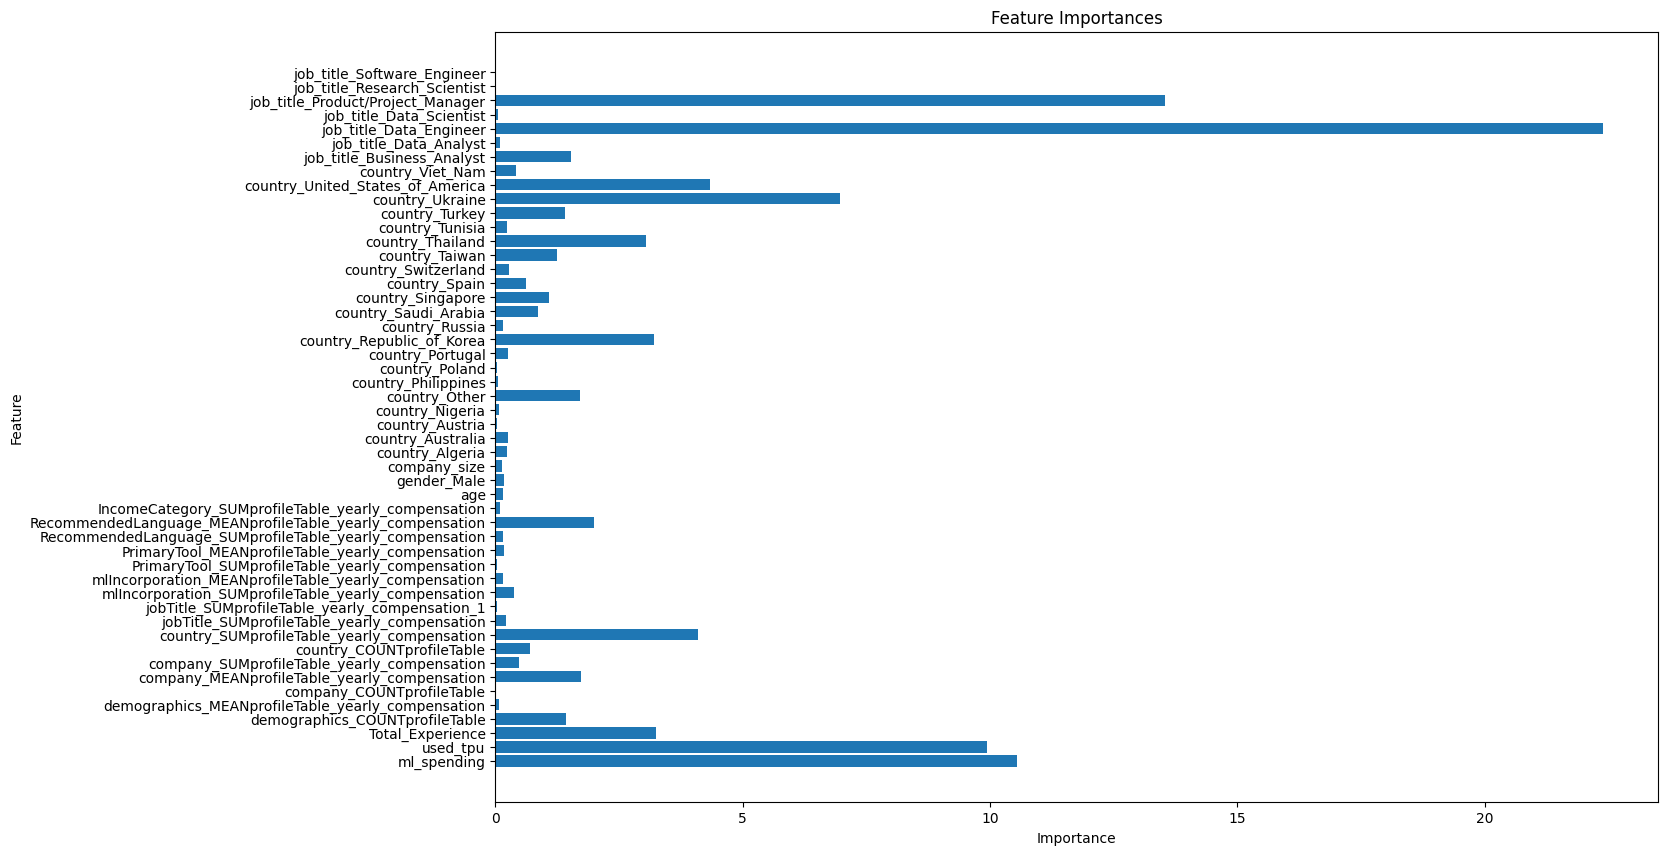

In [32]:
# Plot feature importances
plt.figure(figsize=(15, 10))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### Performing Cross-Validation

In [33]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(best_cat_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-scores) ** 0.5
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')

0:	learn: 7.1827584	total: 5.49ms	remaining: 1.64s
1:	learn: 6.8516570	total: 10.1ms	remaining: 1.5s
2:	learn: 6.5512636	total: 14.9ms	remaining: 1.48s
3:	learn: 6.3174809	total: 19.7ms	remaining: 1.46s
4:	learn: 6.0515949	total: 25ms	remaining: 1.47s
5:	learn: 5.8493050	total: 29.1ms	remaining: 1.43s
6:	learn: 5.6635344	total: 33.4ms	remaining: 1.4s
7:	learn: 5.5004365	total: 37.9ms	remaining: 1.38s
8:	learn: 5.3205092	total: 42.9ms	remaining: 1.39s
9:	learn: 5.1849752	total: 47.1ms	remaining: 1.37s
10:	learn: 5.0522408	total: 51.4ms	remaining: 1.35s
11:	learn: 4.9046764	total: 55.7ms	remaining: 1.34s
12:	learn: 4.7587877	total: 60ms	remaining: 1.32s
13:	learn: 4.6436934	total: 64.1ms	remaining: 1.31s
14:	learn: 4.5303259	total: 69ms	remaining: 1.31s
15:	learn: 4.4323885	total: 74.2ms	remaining: 1.32s
16:	learn: 4.3003446	total: 78.8ms	remaining: 1.31s
17:	learn: 4.2133872	total: 83.4ms	remaining: 1.31s
18:	learn: 4.1374648	total: 88.4ms	remaining: 1.31s
19:	learn: 4.0561652	total: 93

### Residual Analysis

In [34]:
# Model Interpretation (Residual Analysis)
y_pred = best_cat_model.predict(X_test)
residuals = y_test - y_pred

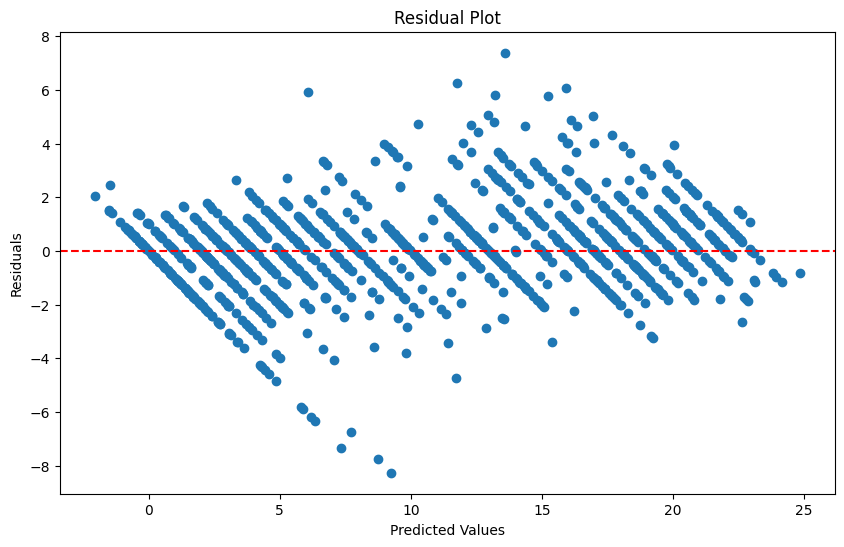

In [35]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()